In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import random

seed = random.randint(1, 1000)
random.seed(seed)
print(f"Seed: {seed}")

Seed: 595


In [5]:
path_to_data = "/content/drive/MyDrive/SBER_Base/Data"

In [6]:
path_to_train = os.path.join(path_to_data, "invest_train.csv")
path_to_test = os.path.join(path_to_data, "invest_test_public.csv")
path_to_pr_test = os.path.join(path_to_data, "invest_test_private.csv")

train_df = pd.read_csv(path_to_train, index_col='customer_id')
X_test = pd.read_csv(path_to_test, index_col='customer_id')

X_train = train_df.drop(columns=["accepted"])
y_train = train_df["accepted"]

###Анализ данных

In [7]:
num_features = ["age", "balance", "offer_amount"]
binary_features = ["previous_investments", "responded_before"]
cat_features = ["risk_profile", "marketing_channel", "membership_tier"]

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6000 non-null   int64  
 1   balance               6000 non-null   float64
 2   risk_profile          6000 non-null   object 
 3   marketing_channel     6000 non-null   object 
 4   offer_amount          6000 non-null   int64  
 5   previous_investments  6000 non-null   int64  
 6   responded_before      6000 non-null   int64  
 7   membership_tier       6000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 421.9+ KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6001 to 7999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   balance               1000 non-null   float64
 2   risk_profile          1000 non-null   object 
 3   marketing_channel     1000 non-null   object 
 4   offer_amount          1000 non-null   int64  
 5   previous_investments  1000 non-null   int64  
 6   responded_before      1000 non-null   int64  
 7   membership_tier       1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 70.3+ KB


In [10]:
X_test

,age,balance,risk_profile,marketing_channel,offer_amount,previous_investments,responded_before,membership_tier
customer_id,,,,,,,,
6001,74,18986.57,low,sms,85099,0,0,gold
6003,38,471729.76,medium,phone,74260,1,0,gold
6005,29,12145.13,medium,phone,22209,1,1,standard
6007,40,493826.13,medium,email,27129,1,1,gold
6009,39,478700.36,medium,in_branch,17918,1,0,platinum
...,...,...,...,...,...,...,...,...
7991,70,92446.01,high,email,27574,1,1,gold
7993,89,7805.98,high,in_branch,31489,0,1,platinum
7995,70,255016.91,high,phone,97820,0,1,platinum


In [11]:
X_train.describe()

,age,balance,offer_amount,previous_investments,responded_before
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.256833,251402.467837,52765.267500,0.507667,0.493333
std,20.733576,146629.547942,27536.358643,0.499983,0.499997
min,18.000000,25.380000,5001.000000,0.000000,0.000000
25%,35.000000,125036.747500,29083.750000,0.000000,0.000000
50%,54.000000,250333.235000,53043.500000,1.000000,0.000000
75%,71.000000,381066.040000,76592.250000,1.000000,1.000000
max,89.000000,499922.130000,99974.000000,1.000000,1.000000


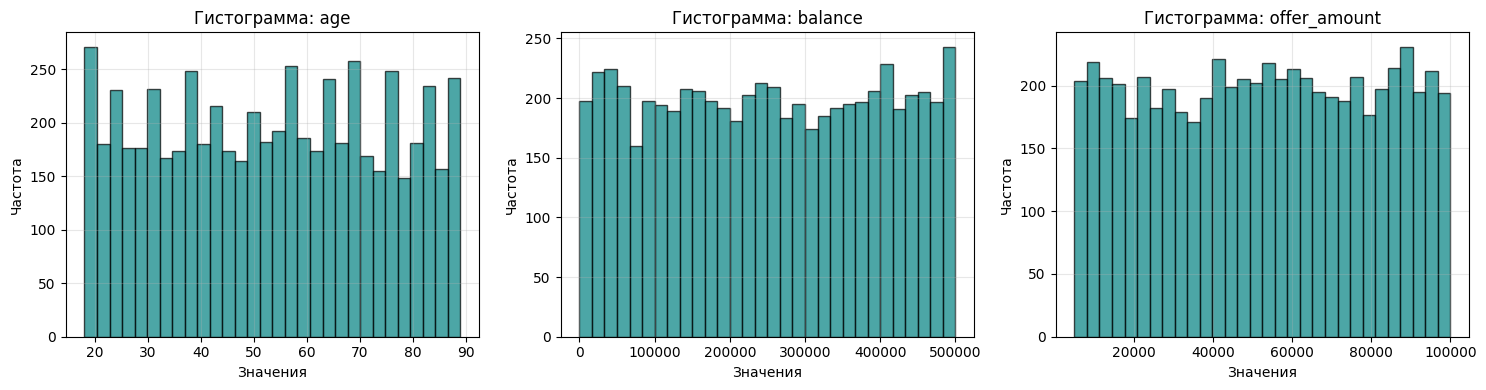

In [12]:
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=num_features)
else:
    X_train_df = X_train

n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, column in enumerate(num_features):
    axes[i].hist(X_train_df[column].dropna(), bins=30, alpha=0.7, color='teal', edgecolor='black')
    axes[i].set_title(f'Гистограмма: {column}')
    axes[i].set_xlabel('Значения')
    axes[i].set_ylabel('Частота')
    axes[i].grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

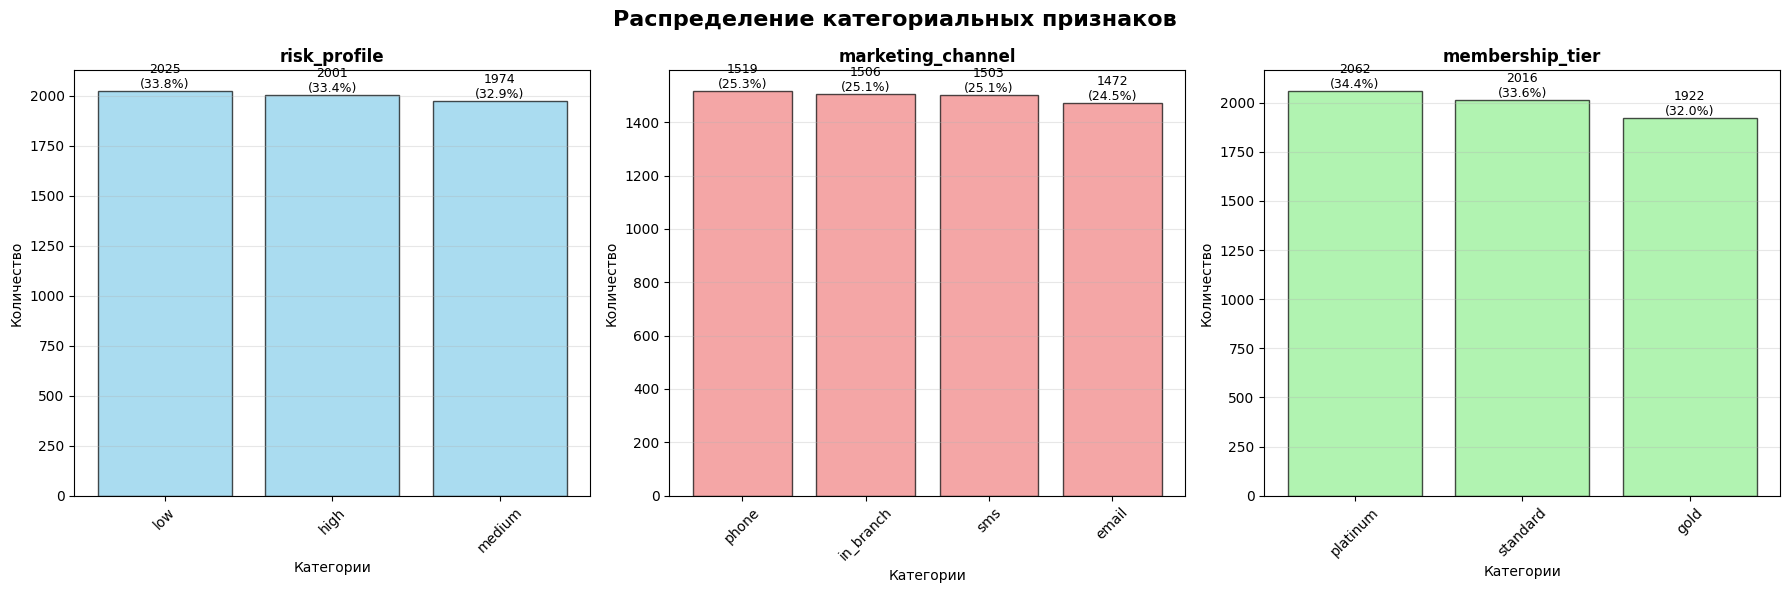

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Распределение категориальных признаков', fontsize=16, fontweight='bold')

colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, feature in enumerate(cat_features):
    value_counts = X_train[feature].value_counts()

    bars = axes[i].bar(value_counts.index, value_counts.values,
                      color=colors[i], alpha=0.7, edgecolor='black')

    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_xlabel('Категории')
    axes[i].set_ylabel('Количество')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

    for bar, value in zip(bars, value_counts.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{value}\n({height/len(X_train)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3899080395.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(X_train[feature].dropna(),
/tmp/ipython-input-3899080395.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(X_train[feature].dropna(),
/tmp/ipython-input-3899080395.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = axes[i].boxplot(X_train[feature].dropna(),


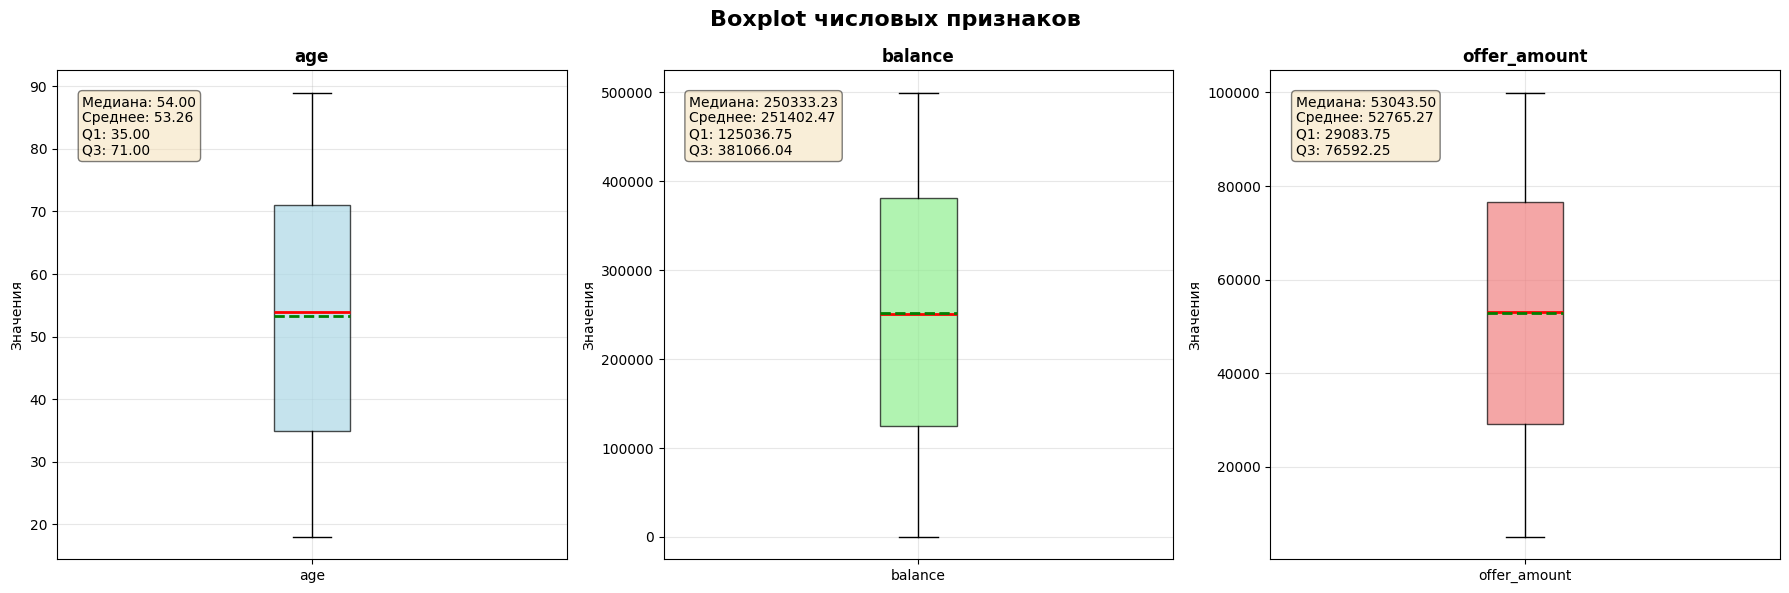

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Boxplot числовых признаков', fontsize=16, fontweight='bold')

colors = ['lightblue', 'lightgreen', 'lightcoral']

for i, feature in enumerate(num_features):
    boxplot = axes[i].boxplot(X_train[feature].dropna(),
                             patch_artist=True,
                             labels=[feature],
                             showmeans=True,
                             meanline=True,
                             showfliers=True)

    boxplot['boxes'][0].set_facecolor(colors[i])
    boxplot['boxes'][0].set_alpha(0.7)
    boxplot['medians'][0].set_color('red')
    boxplot['medians'][0].set_linewidth(2)
    boxplot['means'][0].set_color('green')
    boxplot['means'][0].set_linewidth(2)

    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_ylabel('Значения')
    axes[i].grid(True, alpha=0.3)

    stats = X_train[feature].describe()
    textstr = f'Медиана: {stats["50%"]:.2f}\nСреднее: {stats["mean"]:.2f}\nQ1: {stats["25%"]:.2f}\nQ3: {stats["75%"]:.2f}'
    axes[i].text(0.05, 0.95, textstr, transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

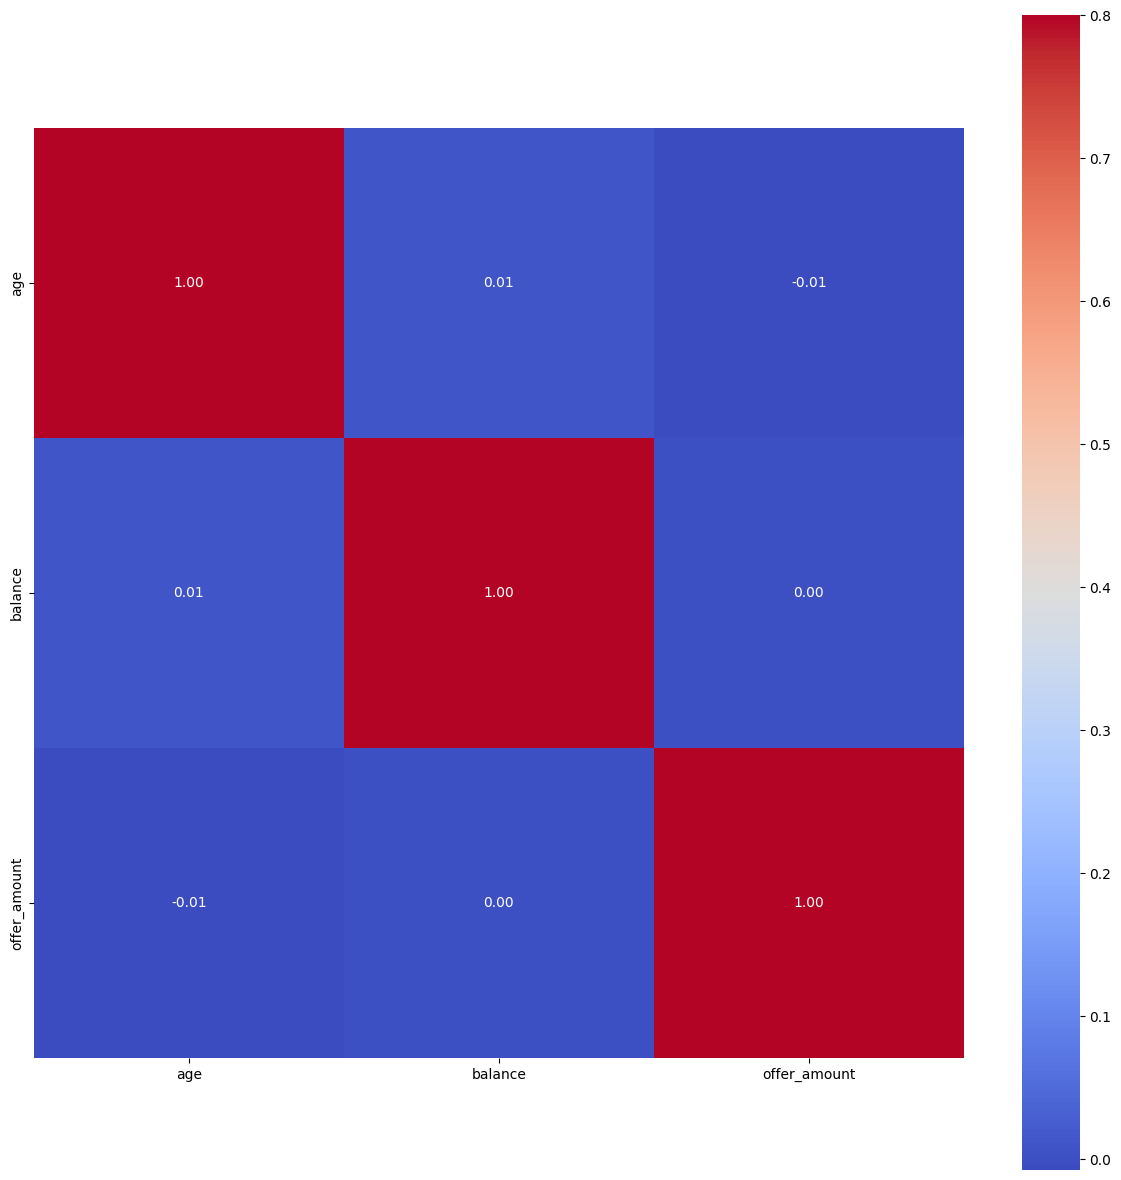

In [15]:
corrmat = X_train[num_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt='.2f', cmap='coolwarm')
plt.show()

In [16]:
y_train.value_counts()

,count
accepted,
1,4352
0,1648


Данные сбалансированные. Таргетный признак несбалансирован

###Обработка данных

###OHE

In [17]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

X_train_cat = X_train[cat_features]
X_train_ohe_sklearn = ohe.fit_transform(X_train_cat)

ohe_columns = ohe.get_feature_names_out(cat_features)

X_train_ohe_df = pd.DataFrame(X_train_ohe_sklearn, columns=ohe_columns, index=X_train.index)

num_bin_features = [col for col in X_train.columns if col not in cat_features]
X_train_processed = pd.concat([X_train[num_bin_features], X_train_ohe_df], axis=1)

In [18]:
X_train_processed

,age,balance,offer_amount,previous_investments,responded_before,risk_profile_low,risk_profile_medium,marketing_channel_in_branch,marketing_channel_phone,marketing_channel_sms,membership_tier_platinum,membership_tier_standard
customer_id,,,,,,,,,,,,
0,75,199122.20,79471,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,72,182826.57,59413,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,82,119785.23,33092,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,320109.79,34806,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,68,166134.85,66491,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,73,107771.18,39293,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5996,71,443467.72,53386,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,60,36070.24,90885,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


###Scaling

In [19]:
scaler = StandardScaler()

X_train_final = X_train_processed.copy()
X_train_final[num_features] = scaler.fit_transform(X_train_processed[num_features])

In [20]:
X_train_final

,age,balance,offer_amount,previous_investments,responded_before,risk_profile_low,risk_profile_medium,marketing_channel_in_branch,marketing_channel_phone,marketing_channel_sms,membership_tier_platinum,membership_tier_standard
customer_id,,,,,,,,,,,,
0,1.048781,-0.356576,0.969916,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.904076,-0.467720,0.241437,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.386426,-0.897692,-0.714506,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.459437,0.468617,-0.652256,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.711136,-0.581566,0.498500,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.952311,-0.979634,-0.489295,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5996,0.855841,1.309976,0.022544,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,0.325256,-1.468668,1.384457,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


###OHE Test

In [21]:
X_test_cat = X_test[cat_features]
X_test_ohe_sklearn = ohe.transform(X_test_cat)

ohe_columns = ohe.get_feature_names_out(cat_features)

X_test_ohe_df = pd.DataFrame(X_test_ohe_sklearn, columns=ohe_columns, index=X_test.index)

num_bin_features = [col for col in X_test.columns if col not in cat_features]
X_test_processed = pd.concat([X_test[num_bin_features], X_test_ohe_df], axis=1)

In [22]:
X_test_processed


,age,balance,offer_amount,previous_investments,responded_before,risk_profile_low,risk_profile_medium,marketing_channel_in_branch,marketing_channel_phone,marketing_channel_sms,membership_tier_platinum,membership_tier_standard
customer_id,,,,,,,,,,,,
6001,74,18986.57,85099,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6003,38,471729.76,74260,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6005,29,12145.13,22209,1,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6007,40,493826.13,27129,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6009,39,478700.36,17918,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7991,70,92446.01,27574,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,89,7805.98,31489,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7995,70,255016.91,97820,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0


###Scaling train

In [23]:
X_test_final = X_test_processed.copy()
X_test_final[num_features] = scaler.transform(X_test_processed[num_features])

In [24]:
X_test_final

,age,balance,offer_amount,previous_investments,responded_before,risk_profile_low,risk_profile_medium,marketing_channel_in_branch,marketing_channel_phone,marketing_channel_sms,membership_tier_platinum,membership_tier_standard
customer_id,,,,,,,,,,,,
6001,1.000546,-1.585187,1.174317,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6003,-0.735913,1.502737,0.780660,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6005,-1.170028,-1.631849,-1.109762,1,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6007,-0.639443,1.653445,-0.931075,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6009,-0.687678,1.550280,-1.265606,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.807606,-1.084159,-0.914913,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,1.724070,-1.661444,-0.772725,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7995,0.807606,0.024652,1.636327,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0


###Saving data into csv

In [25]:
X_train_final.to_csv(path_to_data + '/train_final.csv', index=False)
X_test_final.to_csv(path_to_data + '/test_final.csv', index=False)